In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import plotting

reload(lattice)
reload(hamiltonian)
reload(plotting)



<module 'tblib.plotting' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\plotting.py'>

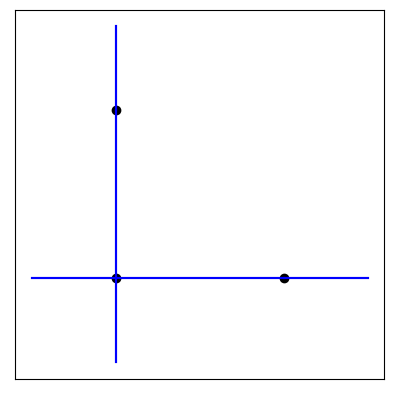

In [2]:
# Create an instance of the diagonally striped lattice
N=2

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, kind='dDSL')
 

#lat.plot_lattice();
lat.plot_nn();

In [3]:
k=np.linspace(0,np.pi, 100)

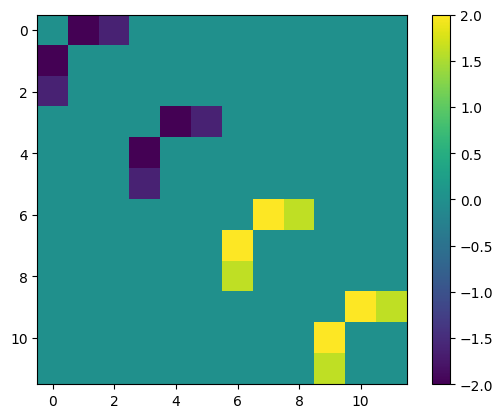

In [4]:
plt.imshow(np.real(ham.Hk(k[40], k[0],dnx=0, dny=0)))
plt.colorbar()

In [5]:
H = ham.Hk

<AxesSubplot: ylabel='Energy (t)'>

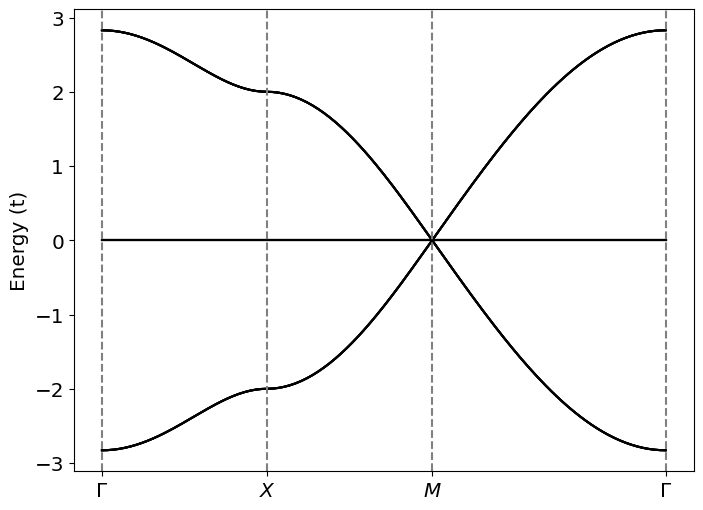

In [6]:
plotting.plot_bands(H, hsp_path='GXMG')

<AxesSubplot: xlabel='DOS', ylabel='Energy (t)'>

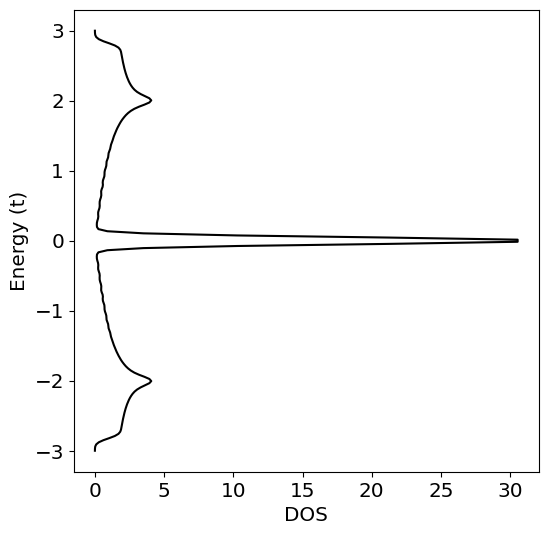

In [7]:
plotting.plot_DOS(H, elim=(-3,3))

In [8]:
E2 = ham.Es(p='all')
s1=np.shape(E2)[0]
E2=E2[:,100:].reshape(s1,100,100)


In [9]:
x = np.outer(np.linspace(-np.pi, np.pi, 100), np.ones(100))
y = x.copy().T
np.shape(E2)


(12, 100, 100)

In [10]:
xticks = [0,1/2*np.pi, np.pi]
xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']
xticks = [0,1/2*np.pi, np.pi]
xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']

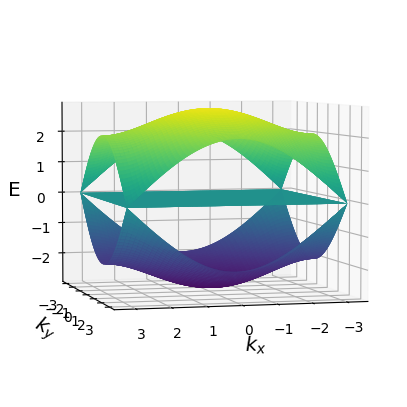

In [11]:
fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(projection='3d')
ax.set_xlabel(r'$k_x$', size='x-large')
ax.set_ylabel(r'$k_y$', size='x-large')
ax.set_zlabel(r'E', size='x-large')
#ax.set_xticks(ticks=xticks, labels= xlabels, size='x-large')
#ax.set_yticks(ticks=xticks, labels=xlabels, size='x-large')


for i in E2:
    surf = ax.plot_surface(x,y, i, vmin=-3, vmax=3, cmap='viridis')
#surf = ax.plot_surface(x,y, E2, vmin=-3, vmax=3, cmap='viridis')
#fig.colorbar(surf)
ax.view_init(elev=4, azim=75, roll=0)
plt.show()

In [12]:
Hli = []
dHli = []
spinupH = []
k = np.linspace(0,2*np.pi, 100)
for x in k:
    Hli.append(ham.Hk(x,0,0,0)[0,2])
    dHli.append(ham.Hk(x,0, dnx=1,dny=0)[0,2])
    spinupH.append(ham.Hk(x,0, reduce=True,dnx=0,dny=0)[3,5])


C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


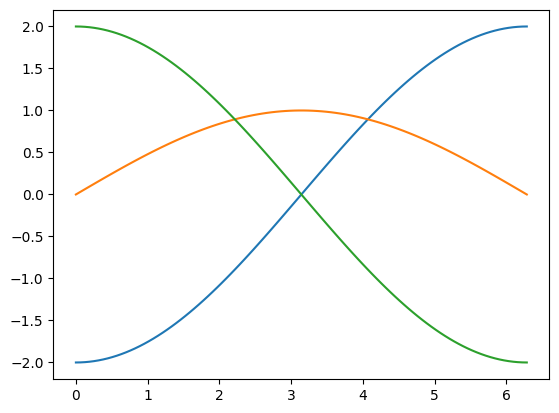

In [13]:
plt.plot(k, Hli)
plt.plot(k, dHli)
plt.plot(k, spinupH)